# Deep vs shallow

We will try to answer: Why not stick to shallow networks?

## Deep not shallow: an example

Following [Telgarsky](https://mjt.cs.illinois.edu/dlt/index.pdf) we define

$$\Delta: [0,1] \ni x \mapsto 2 \mbox{ReLU}(x) - 4 \mbox{ReLU}(x-1/2)$$

We can see this as a two layer neural network, the first layer having a $\mbox{ReLU}$ activation function and $2$ neurons, the second having no activation function and $1$ neuron.

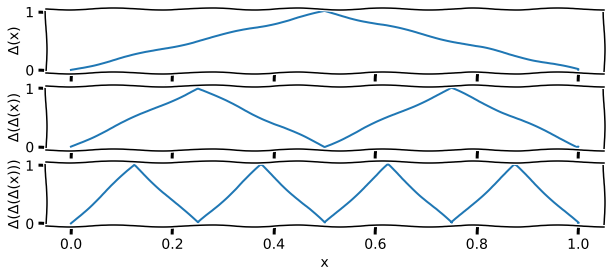

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
plt.xkcd()

relu = lambda x: np.clip(x, 0, np.inf)
Δ = lambda x: 2 * relu(x) - 4 * relu(x - 0.5)
xs = np.linspace(0, 1, 1000)

plt.subplot(3, 1, 1)
plt.plot(xs, Δ(xs))
plt.ylabel("Δ(x)")

plt.subplot(3, 1, 2)
plt.plot(xs, Δ(Δ(xs)))
plt.ylabel("Δ(Δ(x))")

plt.subplot(3, 1, 3)
plt.plot(xs, Δ(Δ(Δ(xs))))
plt.ylabel("Δ(Δ(Δ(x)))")

plt.xlabel("x")
plt.gcf().set_size_inches(10, 4)
plt.show()

This function is a good example to look at because it can surve as a simple proxy of general oscillatory data.

Let $N_A(f)$ be the number of linear regions of a ReLU network $f$. Then we have the following lemma:

````{prf:lemma} The behavior of affine linear regions, [source.](https://mjt.cs.illinois.edu/dlt/index.pdf)
:label: linear_regions_lemma
Let $f$, $g$, $g_1,..., g_k$ $\mathbb{R} \to \mathbb{R}$ be ReLU nets and $b, a_1, ... ,a_k$ be scalars. Then we have
1. $N_A(f+g) \le N_A(f) + N_A(g)$
2. $N_A(\sum_i a_ig_i + b) \le \sum_i N_A(g_i)$
3. $N_A(f \circ g) \le N_A(f) N_A(g)$
4. $N_A(x\mapsto f(\sum_i a_ig_i(x) + b)) \le N_A(f)\sum_i N_A(g_i)$
````

```{admonition} Click for proof.
:class: dropdown
````{prf:proof}


1. For $f$ has $N_A(f) - 1$ kinks. $f+g$ has $\le N_A(f) + N_A(g) - 2$ kinks and therefore $\le N_A(f) + N_A(g) - 1$ linear regions.

2. $a_ig_i +b$ has as many kinks as $g_i$. Therefore this statment follows via induction from the previous.

3. Let $P_A(g)$ denoite the number of linear regions of $g$. For a fixed $U\in P_A(g)$; $g|_U$ is a fixed affine function. If we now consider each $T\in P_A(f|_{g(U)})$, we know $f\circ g$ is affine on $U\cap g|_U^{-1}(T)$ and we have
$\sum_{U\in P_A(g)}N_A(f|_{g(U)}) \le \sum_{U\in P_A(g)} N_A(f) \le N_A(g)N_A(f).$

4. Follows directly from the previous two points.

$\square$
```

````{prf:lemma} Bounds on the number of affine linear regions, [source.](https://mjt.cs.illinois.edu/dlt/index.pdf)
:label: n_linear_regions_lemma
Let $f:\mathbb{R} \to \mathbb{R}$ be an $L$ layer ReLU network with widths $(m_1, ..., m_L)$ and $m=\sum_i m_i$ and let $N_A(f)$ be the number of affine pieces of $f$. Then we have:

$$N_A(g) \le 2^L\Pi_{j<L} m_j$$

and

$$N_A(f) \le \left(\frac{2m}{L}\right)^L.$$

````

```{admonition} Click for proof.
:class: dropdown
````{prf:proof}

We prove the first statement by induction.

* For zero layers (identity) we have $N_A(g)=1$.
* For $g$ begin an output in the $i+1$th layer and the $g_i$ the previous layer's outputs we have

$$
\begin{aligned}
N_A(g) &= N_A(\text{ReLU}(b+\sum_j^{m_i} a_jg_j)) \le 2 \sum_j^{m_i} N_A(g_j) \\
&\le 2 \sum_j^{m_i} \Pi_{k<i} (2 m_k) = 2^{i+1} m_i \Pi_{k<i} m_k.
\end{aligned}
$$

We prove the second statement by using the first and via the simple calculation:

$$\Pi_{j\le L} m_j = \exp \sum_{j\le L} \ln m_j = \exp L \frac{1}{L} \sum_{j\le L} \ln m_j \le \exp L \ln \frac{1}{L} \sum_{j\le L} m_j = \left(\frac{m}{L}\right)^L. $$

$\square$
```

````{prf:theorem} Shallow vs deep, [source.](https://mjt.cs.illinois.edu/dlt/index.pdf)
:label: shallow_vs_deep_thm
For any $L\ge2$ we have that $f=\Delta^{L^2+2}$ is a ReLU network wirh $3L^2+6$ (non-input) neurons and $2L^2+4$ layers.

But, any ReLU network $g$ with $\le 2^L$ nodes and $\le L$ layers can not represent the function:

$$\int_{[0, 1]} |f(x) - g(x)| dx \ge \frac{1}{32}.$$
````

```{admonition} Click for proof.
:class: dropdown
````{prf:proof}

As the fact that $f = \Delta^{L^2+2}$ is a ReLU network is easy to see, we will only prove the lower approximation bound for the shallower networks.

We begin by noticing that $f = \Delta^{L^2+2}$ is composed of $2^{L+1}$ contracted copies of $\Delta$.

If we now plot $f$ and $x\mapsto \frac{1}{2}$, this leads to $2^{L^2+2}-1$ (half-)triangles, $2^{L^2+1}$ above and $2^{L^2+1} - 1$ below. See the figure below for the $L=1$ clase.

Further it is easy to see that each (half-)triangle has an area of $\frac{1}{4} \frac{1}{2^{L^2+2}} = 2^{-L^2-4}$.

Via the {prf:ref}`n_linear_regions_lemma`, we have for the shallower network $g$, that

$$N_A(g) \le (2\frac{2^L}{L})^L \le 2^{L^2}.$$

We will now consider how many (half-)triangles $g$ can cross through. We can count all others contributing to a lower bound on the approximation error with their full surface area.

Each linear region of $g$ can only cross the $\frac{1}{2}$ line once (per section that containing onw (half-)trangle above and one below.)  and thereby potentially take out both (half-)triangles on both sides.
I.e., this way $g$ can cross $2^{L^2 + 1}$ triangles. This leaves us with a $2^{L^2+2} - 1 - 2^{L^2 + 1}$ uncrossed triangles. But since $g$ could also not cross the $\frac{1}{2}$ line, it could also cross out multiple (half-)traingles on the same side with that linear region. On the otherside, literally, this would leave the triangles untouched though. To account for this we have to devide by a factor of $2$ to obtain the number of uncrossed traingles as

$$\frac{1}{2}\left(2^{L^2+2} - 1 - 2^{L^2 + 1}\right) = \frac{1}{2}\left(2^{L^2+1} - 1\right).$$

With the area of the triangles as discussed above we have

$$\int_{[0, 1]} |f(x) - g(x)| dx \ge \frac{1}{2}\left(2^{L^2+1} - 1\right) \left(2^{-L^2 - 4}\right) \ge \frac{1}{32}.$$

$\square$
```

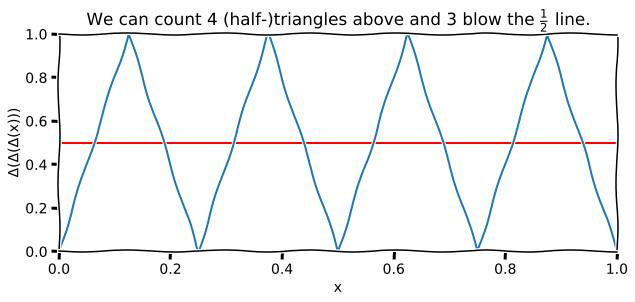

In [2]:
plt.plot(xs, Δ(Δ(Δ(xs))))
plt.ylabel("Δ(Δ(Δ(x)))")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.hlines(0.5, 0, 1, 'r')

plt.xlabel("x")
plt.title(r"We can count 4 (half-)triangles above and 3 blow the $\frac{1}{2}$ line.")
plt.gcf().set_size_inches(10, 4)
plt.show()

## Exercises
* Train simple ReLU MLPs with $L=1,..,8$ layers and constant width to approximate $\Delta^3$. For each $L$ try to find the smallest width that "perfectly" represents $\Delta$ and plot the width over $L$ (via numerical experiments).
* Train a ReLU network with width 8 and different depth on the `sklearn.datasets.make_moons` dataset and color-code the input regions over which the network has the same gradient w.r.t. the 2d input. Use the `torch.nn.BCEWithLogitsLoss` criterion to train the model and use the following functions to create the plot. What do you observe about the regions in general and w.r.t. networks of different depths?

In [3]:
def get_grad_wrt_input(model, xs_rand):
    model.eval()

    xs_rand = xs_rand.clone().requires_grad_()
    y_hat = model(xs_rand)

    grad = torch.autograd.grad(
        y_hat,
        xs_rand,
        grad_outputs=torch.ones_like(y_hat)
    )
    return grad[0].detach()

In [4]:
def get_colors(grads):
    colors = np.zeros((len(grads), 3))
    colors[:,:2] = grads
    colors[:,:2] -= colors[:,:2].min()
    colors[:,:2] /= colors[:,:2].max()
    colors[:,-1] = grads.norm(dim=1)
    colors[:,-1] /= colors[:,-1].max()

    assert len(grads.norm(dim=-1)) > 4

    return colors

### Load and plot the `make_moons` data

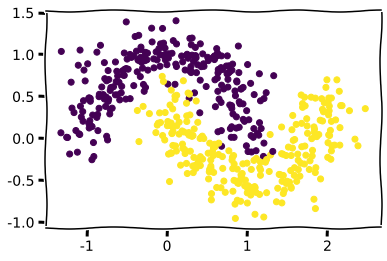

In [5]:
import torch
from sklearn.datasets import make_moons

xs, ys = make_moons(
    n_samples=512,
    shuffle=True,
    noise=0.2,
    random_state=42
)

xs = torch.tensor(xs, dtype=torch.float32).view(-1, 2)
ys = torch.tensor(ys, dtype=torch.float32).view(-1, 1)

plt.scatter(xs[:,0], xs[:,1], c=ys)
plt.show()

### Define the ReLU network

In [6]:
def get_model(depth, width):
    assert depth >= 2, "Depth must be >= 1"
    assert width >= 1, "Width must be >= 1"

    model = torch.nn.Sequential()

    model.add_module(f"layer_0", torch.nn.Linear(2, width))
    model.add_module(f"relu_0", torch.nn.ReLU())

    for i in range(1, depth - 1):
        model.add_module(f"layer_{i}", torch.nn.Linear(width, width))
        model.add_module(f"relu_{i}", torch.nn.ReLU())

    model.add_module("last_layer", torch.nn.Linear(width, 1))

    return model

### Initalize training setup

In [7]:
def get_train_batch(batch_size=64):
    idxs = torch.randperm(len(xs))[:batch_size]

    xs_batch = xs[idxs]
    ys_batch = ys[idxs]

    return xs_batch, ys_batch

In [8]:
model = get_model(8, 8)
optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.BCEWithLogitsLoss()

losses = []

### Training loop

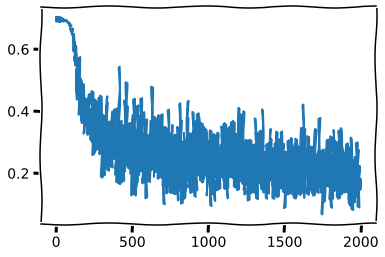

In [9]:
for _ in range(2000):
    xs_batch, ys_batch = get_train_batch()
    ys_hat = model(xs_batch)

    loss = criterion(ys_hat, ys_batch)
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


plt.plot(losses)
plt.show()

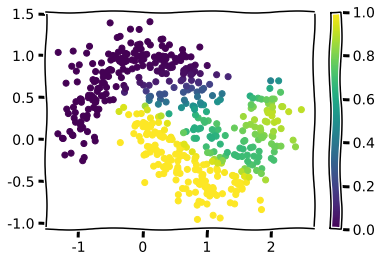

In [10]:
model.eval()
ys_hat = torch.sigmoid(model(xs)).detach()

plt.scatter(xs[:,0], xs[:,1], c=ys_hat)
plt.colorbar()
plt.show()

In [11]:
xs_rand = torch.rand(20000, 2)
xs_rand[:,0] = xs_rand[:,0] * 4 - 1.5
xs_rand[:,1] = xs_rand[:,1] * 2.5 - 1

grads = get_grad_wrt_input(model, xs_rand)
colors = get_colors(grads)

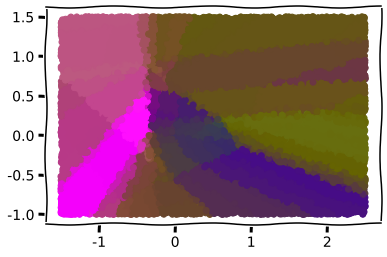

In [12]:
plt.scatter(xs_rand[:,0], xs_rand[:,1], c=colors)
#plt.scatter(xs[:,0], xs[:,1], c=ys_hat)
plt.show()